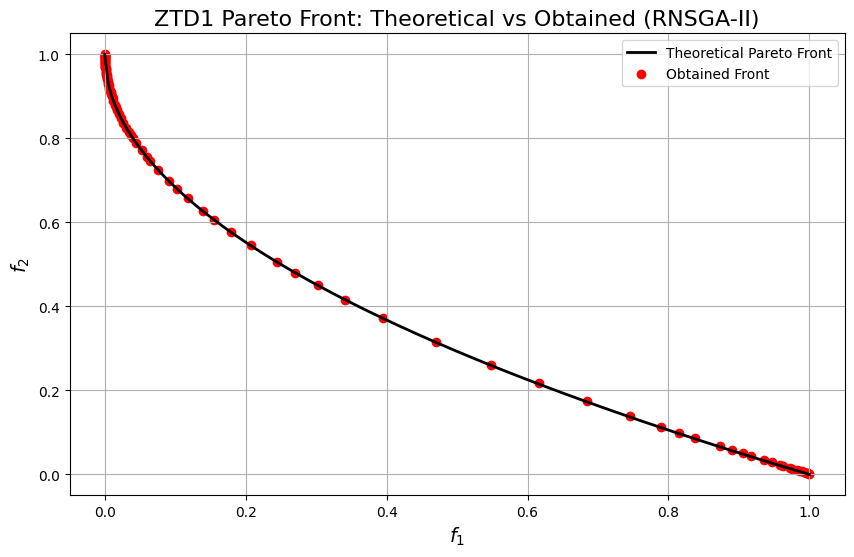

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from pymoors import (
    AgeMoea,
    RandomSamplingFloat,
    GaussianMutation,
    SimulatedBinaryCrossover,
    CloseDuplicatesCleaner,
    Constraints
)
from pymoors.schemas import Population
from pymoors.typing import TwoDArray

np.seterr(invalid="ignore")


def evaluate_ztd1(x: TwoDArray) -> TwoDArray:
    """
    Evaluate the ZTD1 objectives in a fully vectorized manner.
    """
    f1 = x[:, 0]
    g = 1 + 9.0 / (30 - 1) * np.sum(x[:, 1:], axis=1)
    f2 = g * (1 - np.power((f1 / g), 0.5))
    return np.column_stack((f1, f2))


def ztd1_theoretical_front():
    """
    Compute the theoretical Pareto front for ZTD1.
    """
    f1_theo = np.linspace(0, 1, 200)
    f2_theo = 1 - np.sqrt(f1_theo)
    return f1_theo, f2_theo


# Set up AgeMoea algorithm
algorithm = AgeMoea(
    sampler=RandomSamplingFloat(min=0, max=1),
    crossover=SimulatedBinaryCrossover(distribution_index=15),
    mutation=GaussianMutation(gene_mutation_rate=0.1, sigma=0.01),
    fitness_fn=evaluate_ztd1,
    constraints_fn=Constraints(lower_bound=0.0, upper_bound=1.0),
    duplicates_cleaner=CloseDuplicatesCleaner(epsilon=1e-8),
    num_vars=30,
    population_size=100,
    num_offsprings=100,
    num_iterations=200,
    mutation_rate=0.1,
    crossover_rate=0.9,
    keep_infeasible=False,
    verbose=False,
    seed=42,
)

# Run the algorithm
algorithm.run()

# Get the best Pareto front obtained (as a Population instance)
best: Population = algorithm.population.best_as_population
obtained_fitness = best.fitness

# Compute the theoretical Pareto front for ZTD1
f1_theo, f2_theo = ztd1_theoretical_front()

# Plot the theoretical Pareto front, obtained front, and reference points
plt.figure(figsize=(10, 6))
plt.plot(f1_theo, f2_theo, "k-", linewidth=2, label="Theoretical Pareto Front")
plt.scatter(
    obtained_fitness[:, 0],
    obtained_fitness[:, 1],
    c="r",
    marker="o",
    label="Obtained Front",
)
plt.xlabel("$f_1$", fontsize=14)
plt.ylabel("$f_2$", fontsize=14)
plt.title("ZTD1 Pareto Front: Theoretical vs Obtained (RNSGA-II)", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()